In [1]:
import numpy as np 
import matplotlib as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import gaussian_kde
import pathlib
from matplotlib.colors import ListedColormap

In [2]:
import neost
from neost.eos import polytropes
from neost.Star import Star

ModuleNotFoundError: No module named 'neost'

In [ ]:
import neost.global_imports as global_imports

c = global_imports._c
G = global_imports._G
Msun = global_imports._M_s
pi = global_imports._pi
rho_ns = global_imports._rhons

In [3]:
plots_directory = '../plots/'
data_directory = '../results/prior/Appendix_B/'

In [4]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] ='serif'


In [ ]:
gamma1 = np.array([1.1,2.3,3.8])
gamma2 = np.array([5.7,4.,3.8])
gamma3 = np.array([3.,2.6,2.2])
rho_t1 = np.array([2,1.8,1.8])
rho_t2 = np.array([3.7,4.,2.7])

In [ ]:
lns = []
fig, ax = pyplot.subplots(1,1, figsize=(12, 10))
for i in range(len(gamma1)):
    EOS = polytropes.PolytropicEoS(crust='ceft-Hebeler', rho_t=2e14,adm_type = 'None')
    EOS.update({'gamma1':gamma1[i], 'gamma2':gamma2[i], 'gamma3':gamma3[i], 'rho_t1':rho_t1[i], 'rho_t2':rho_t2[i], 'ceft':2.6}, max_edsc=True)
    central_densities = np.logspace(14.3,np.log10(EOS.max_edsc),50)
    MR = np.zeros((len(central_densities), 2))
    for k, eps in enumerate(central_densities):
        star = Star(eps)
        star.solve_structure(EOS.energydensities, EOS.pressures)
        MR[k] = star.Mrot, star.Req
    if (i==0):
        lns1 = ax.plot(MR[:,1], MR[:,0],label = 'Soft EoS', lw=2.5)
    elif(i==1):
        lns1 = ax.plot(MR[:,1], MR[:,0],label = 'Int. Stiff EoS', lw=2.5)
    else:
        lns1 = ax.plot(MR[:,1], MR[:,0],label ='Stiff EoS', lw=2.5)
        
    lns = lns + lns1

    
ax.set_xlabel(r'Radius [km]', fontsize=28)
ax.set_ylabel(r'Mass [M$_\odot$]', fontsize=28)
ax.tick_params(width=2, labelsize=22, direction='in')
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc='best', fontsize=26)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,fontsize=22)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
pyplot.tight_layout()
pyplot.show()
pyplot.savefig(plots_directory + 'MR_fixed.png')

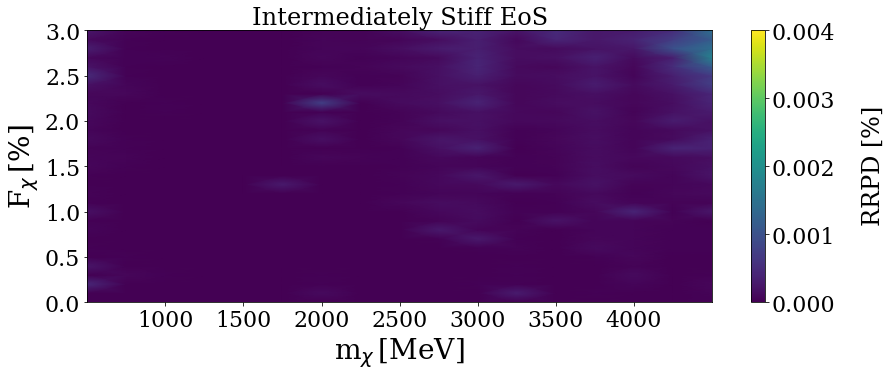

In [7]:
fig, ax = pyplot.subplots(1,1, figsize=(14,5))
Array = np.load(data_directory + 'Relcent_diff_intermediate_stiff_baryonic.npy')
mchi_start = 500
mchi_end = 4500

mchi_step = 250
mchi_num_steps = len(Array)
mchi_array = np.linspace(mchi_start,mchi_end,mchi_num_steps)


fchi_start = 0.
fchi_end = 3.

#Array of mass-fractions in which we increment by 0.1
step_size = 0.1
fchi_num_steps = (fchi_end-fchi_start)/step_size
fchi_num_steps = int(fchi_num_steps)+1
#Generating the ADM mass-fraction array of evenly spaces mass-fractions seperated by 0.1%
fchi_array = np.linspace(fchi_start,fchi_end,fchi_num_steps)



X, Y = np.meshgrid(mchi_array, fchi_array)
pos1 = ax.pcolormesh(X, Y, Array.T,shading ='gouraud',cmap='viridis') #shading ='gouraud' used for pcolormesh
pos1.set_clim(0.0,.004)
cbar = fig.colorbar(pos1, ax=ax,ticks = [0.,.001,.002,.003,.004])
cbar.set_label('RRPD [$\%$]',rotation = 90,labelpad = 25,fontsize=24)
cbar.ax.tick_params(labelsize=22)
ax.set_ylabel('F$_\chi \, [\%]$',fontsize=28)
ax.set_xticks([1000,1500,2000,2500,3000,3500,4000])
ax.set_xlabel('m$_\chi \, [\mathrm{MeV}]$',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_title('Intermediately Stiff EoS',fontsize = 24)
pyplot.savefig(plots_directory + 'Percent_diff_intermediate_stiff_plot.png')
pyplot.show()

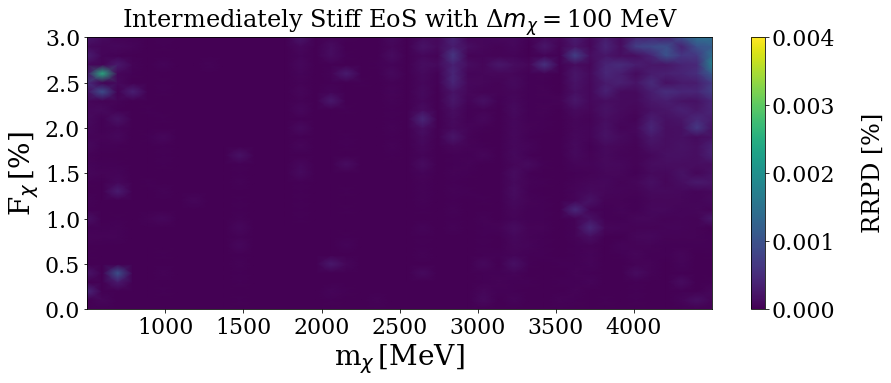

In [8]:
fig, ax = pyplot.subplots(1,1, figsize=(14,5))
Array = np.load(data_directory + 'Relcent_diff_intermediate_stiff_newmchistep_baryonic.npy')
mchi_start = 500
mchi_end = 4500

mchi_step = 100
mchi_num_steps = len(Array)
mchi_array = np.linspace(mchi_start,mchi_end,mchi_num_steps)


fchi_start = 0.
fchi_end = 3.

#Array of mass-fractions in which we increment by 0.1
step_size = 0.1
fchi_num_steps = (fchi_end-fchi_start)/step_size
fchi_num_steps = int(fchi_num_steps)+ 1
#Generating the ADM mass-fraction array of evenly spaces mass-fractions seperated by 0.1%
fchi_array = np.linspace(fchi_start,fchi_end,fchi_num_steps)





X, Y = np.meshgrid(mchi_array, fchi_array)
pos1 = ax.pcolormesh(X, Y, Array.T,shading ='gouraud',cmap='viridis') #shading ='gouraud' used for pcolormesh
pos1.set_clim(0.0,.004)
cbar = fig.colorbar(pos1, ax=ax,ticks = [0.,.001,.002,.003,.004])
cbar.set_label('RRPD [$\%$]',rotation = 90,labelpad = 25,fontsize=24)
cbar.ax.tick_params(labelsize=22)
ax.set_ylabel('F$_\chi \, [\%]$',fontsize=28)
ax.set_xlabel('m$_\chi \, [\mathrm{MeV}]$',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([1000,1500,2000,2500,3000,3500,4000])
ax.set_title('Intermediately Stiff EoS with $\Delta m_\chi = 100$ MeV',fontsize = 24)
pyplot.savefig(plots_directory + 'Percent_diff_intermediate_stiff_plot_newmchistep.png')
pyplot.show()

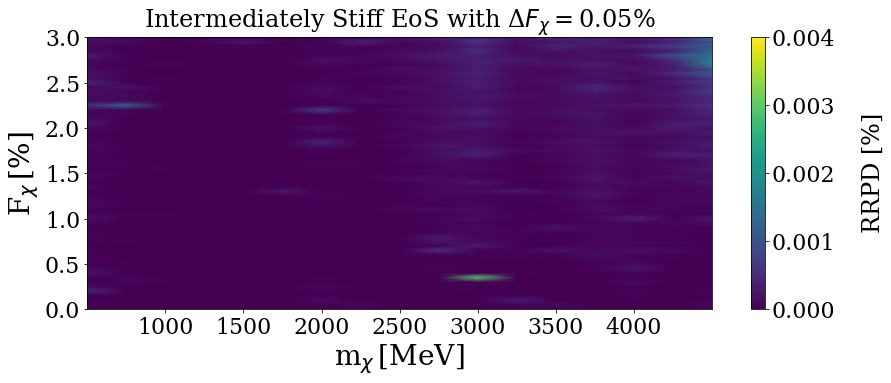

In [9]:
fig, ax = pyplot.subplots(1,1, figsize=(14,5))
Array = np.load(data_directory + 'Relcent_diff_intermediate_stiff_newfchistep_baryonic.npy')
mchi_start = 500
mchi_end = 4500

mchi_step = 250
mchi_num_steps = len(Array)
mchi_array = np.linspace(mchi_start,mchi_end,mchi_num_steps)


fchi_start = 0.
fchi_end = 3.

#Array of mass-fractions in which we increment by 0.1
step_size = 0.05
fchi_num_steps = (fchi_end-fchi_start)/step_size
fchi_num_steps = int(fchi_num_steps)+1
#Generating the ADM mass-fraction array of evenly spaces mass-fractions seperated by 0.1%
fchi_array = np.linspace(fchi_start,fchi_end,fchi_num_steps)



X, Y = np.meshgrid(mchi_array, fchi_array)
pos1 = ax.pcolormesh(X, Y, Array.T,shading ='gouraud',cmap='viridis') #shading ='gouraud' used for pcolormesh
pos1.set_clim(0.0,.004)
cbar = fig.colorbar(pos1, ax=ax,ticks = [0.,.001,.002,.003,.004])
cbar.set_label('RRPD [$\%$]',rotation = 90,labelpad = 25,fontsize=24)
cbar.ax.tick_params(labelsize=22)
ax.set_ylabel('F$_\chi \, [\%]$',fontsize=28)
ax.set_xlabel('m$_\chi \, [\mathrm{MeV}]$',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([1000,1500,2000,2500,3000,3500,4000])
ax.set_title('Intermediately Stiff EoS with $\Delta F_\chi = 0.05 \%$',fontsize = 24)
pyplot.savefig(plots_directory + 'Percent_diff_intermediate_stiff_plot_newfchistep.png')
pyplot.show()

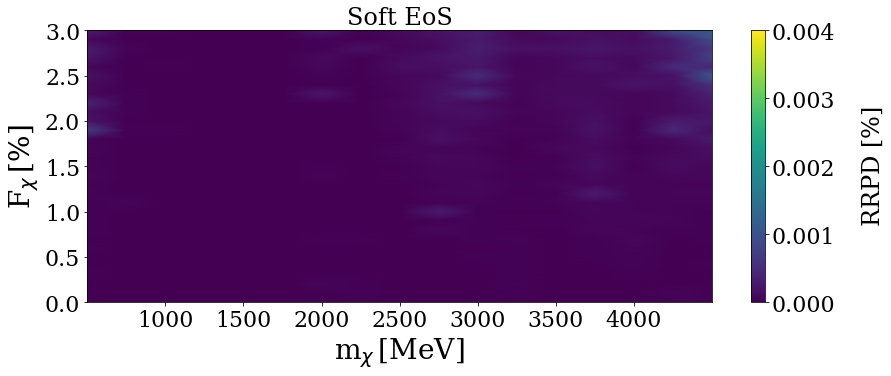

In [10]:
fig, ax = pyplot.subplots(1,1, figsize=(14,5))
Array = np.load(data_directory + 'Relcent_diff_soft_baryonic.npy')
mchi_start = 500
mchi_end = 4500

mchi_step = 250
mchi_num_steps = len(Array)
mchi_array = np.linspace(mchi_start,mchi_end,mchi_num_steps)



fchi_start = 0.
fchi_end = 3.

#Array of mass-fractions in which we increment by 0.1
step_size = 0.1
fchi_num_steps = (fchi_end-fchi_start)/step_size
fchi_num_steps = int(fchi_num_steps)+1
#Generating the ADM mass-fraction array of evenly spaces mass-fractions seperated by 0.1%
fchi_array = np.linspace(fchi_start,fchi_end,fchi_num_steps)



X, Y = np.meshgrid(mchi_array, fchi_array)
pos1 = ax.pcolormesh(X, Y, Array.T,shading ='gouraud',cmap='viridis') #shading ='gouraud' used for pcolormesh
pos1.set_clim(0.0,.004)
cbar = fig.colorbar(pos1, ax=ax,ticks = [0.,.001,.002,.003,.004])
cbar.set_label('RRPD [$\%$]',rotation = 90,labelpad = 25,fontsize=24)
cbar.ax.tick_params(labelsize=22)
ax.set_ylabel('F$_\chi \, [\%]$',fontsize=28)
ax.set_xlabel('m$_\chi \, [\mathrm{MeV}]$',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([1000,1500,2000,2500,3000,3500,4000])
ax.set_title('Soft EoS',fontsize = 24)
pyplot.savefig(plots_directory + 'Percent_diff_soft_plot.png')
pyplot.show()

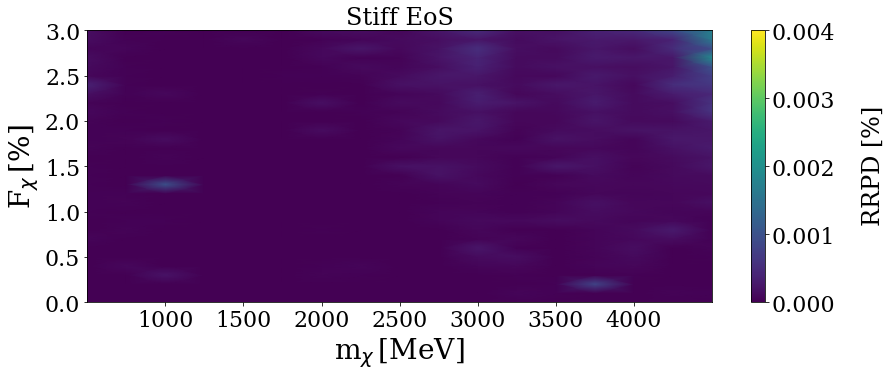

In [11]:
fig, ax = pyplot.subplots(1,1, figsize=(14,5))
Array = np.load(data_directory + 'Relcent_diff_stiff_baryonic.npy')
mchi_start = 500
mchi_end = 4500

mchi_step = 250
mchi_num_steps = len(Array)
mchi_array = np.linspace(mchi_start,mchi_end,mchi_num_steps)


fchi_start = 0.
fchi_end = 3.

#Array of mass-fractions in which we increment by 0.1
step_size = 0.1
fchi_num_steps = (fchi_end-fchi_start)/step_size
fchi_num_steps = int(fchi_num_steps)+1
#Generating the ADM mass-fraction array of evenly spaces mass-fractions seperated by 0.1%
fchi_array = np.linspace(fchi_start,fchi_end,fchi_num_steps)



X, Y = np.meshgrid(mchi_array, fchi_array)
pos1 = ax.pcolormesh(X, Y, Array.T,shading ='gouraud',cmap='viridis') #shading ='gouraud' used for pcolormesh
pos1.set_clim(0.0,.004)
cbar = fig.colorbar(pos1, ax=ax,ticks = [0.,.001,.002,.003,.004])
cbar.set_label('RRPD [$\%$]',rotation = 90,labelpad = 25,fontsize=24)
cbar.ax.tick_params(labelsize=22)
ax.set_ylabel('F$_\chi \, [\%]$',fontsize=28)
ax.set_xlabel('m$_\chi \, [\mathrm{MeV}]$',fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xticks([1000,1500,2000,2500,3000,3500,4000])
ax.set_title('Stiff EoS',fontsize = 24)
pyplot.savefig(plots_directory + 'Percent_diff_stiff_plot.png')
pyplot.show()